In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Задание 1: Загрузка данных
data = pd.read_csv("/Users/komik/Documents/web_clients_correct__1_.csv")

In [37]:
data['region'] = data['region'].apply(lambda x: x.strip().split(':', 1)[-1])
data['region'] = data['region'].apply(lambda x: x.strip().split(':')[-1])
data['region'] = data['region'].apply(lambda x: x.strip().split('/')[-1])

In [38]:
# Задание 2: Анализ данных
purchase_summary_browser = data.groupby('browser')['bill'].agg(['min', 'max', 'mean', 'median']).reset_index()
purchase_summary_device = data.groupby('device_type')['bill'].agg(['min', 'max', 'mean', 'median']).reset_index()
purchase_summary_gender = data.groupby('sex')['bill'].agg(['min', 'max', 'mean', 'median']).reset_index()
purchase_summary_region = data.groupby('region')['bill'].agg(['min', 'max', 'mean', 'median']).reset_index()

In [25]:
print("Сводная таблица по браузерам:")
print(purchase_summary_browser)

Сводная таблица по браузерам:
             browser  min   max        mean  median
0             Chrome   40  1500  764.770492   756.0
1            Firefox   33  1496  799.096667   804.0
2  Internet Explorer   60  1477  717.335714   694.5
3              Opera   35  1493  794.658824   846.5


In [26]:
print("Сводная таблица по устройствам:")
print(purchase_summary_device)

Сводная таблица по устройствам:
  device_type  min   max        mean  median
0     desktop   34  1485  793.837104   820.0
1      laptop   42  1477  801.832579   823.0
2      mobile   40  1497  738.429787   735.0
3      tablet   33  1500  766.088235   744.0


In [27]:
print("Сводная таблица по полу:")
print(purchase_summary_gender)

Сводная таблица по полу:
      sex  min   max        mean  median
0  female   33  1500  773.683140   769.0
1    male   34  1497  774.704028   789.0


In [39]:
print("Сводная таблица по регионам:")
print(purchase_summary_region)

Сводная таблица по регионам:
        region   min   max         mean  median
0            -    45  1472   769.300578   769.0
1           AB   234   793   513.500000   513.5
2           AZ  1429  1429  1429.000000  1429.0
3    Argentina  1186  1186  1186.000000  1186.0
4    Australia  1356  1356  1356.000000  1356.0
..         ...   ...   ...          ...     ...
102         WA   120  1331   769.000000   823.0
103         WI    64  1133   757.250000   812.5
104         WV   467  1267   867.000000   867.0
105      Wales  1377  1377  1377.000000  1377.0
106      Yorks   723   723   723.000000   723.0

[107 rows x 5 columns]


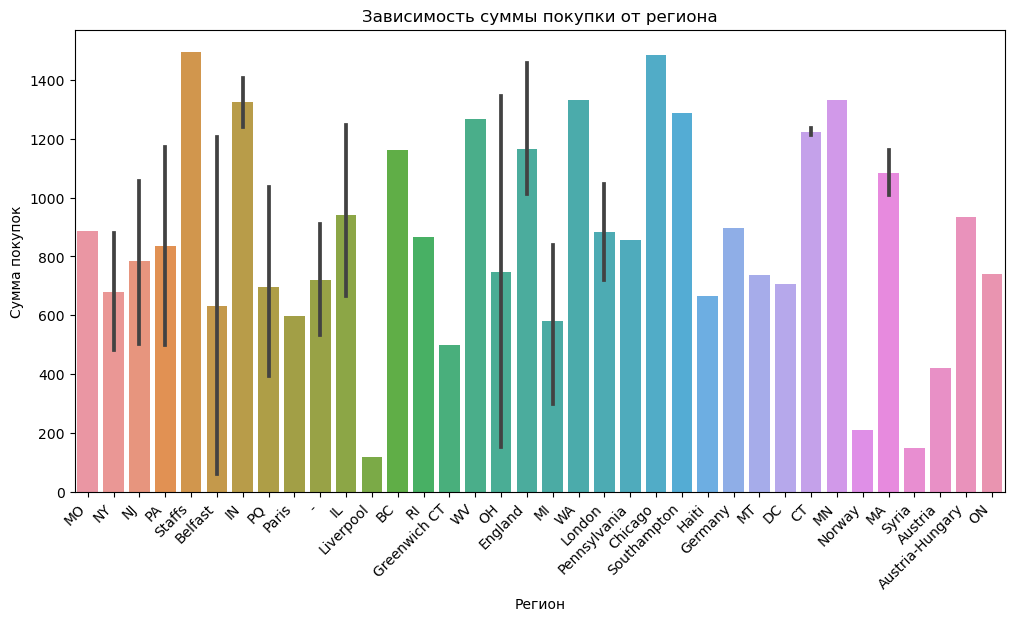

In [58]:
# Задание 3: Визуализация зависимости cуммы покупки от региона
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bill', data=data[::10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Регион')
plt.ylabel('Сумма покупок')
plt.title('Зависимость суммы покупки от региона')
plt.show()

Из графика мы видим, зависимость существует, но не прямая. Возможно, анализируемый продукт популярен в определенных регионах, но из графика можно сделать вывод только о том, что наименьшая сумма покупок у пользователец из Ливерпуля (это может говорить о наличии более популярного местного аналога), Норвегии и Сирии (это может зависеь от стоимости доставки в эти страны).

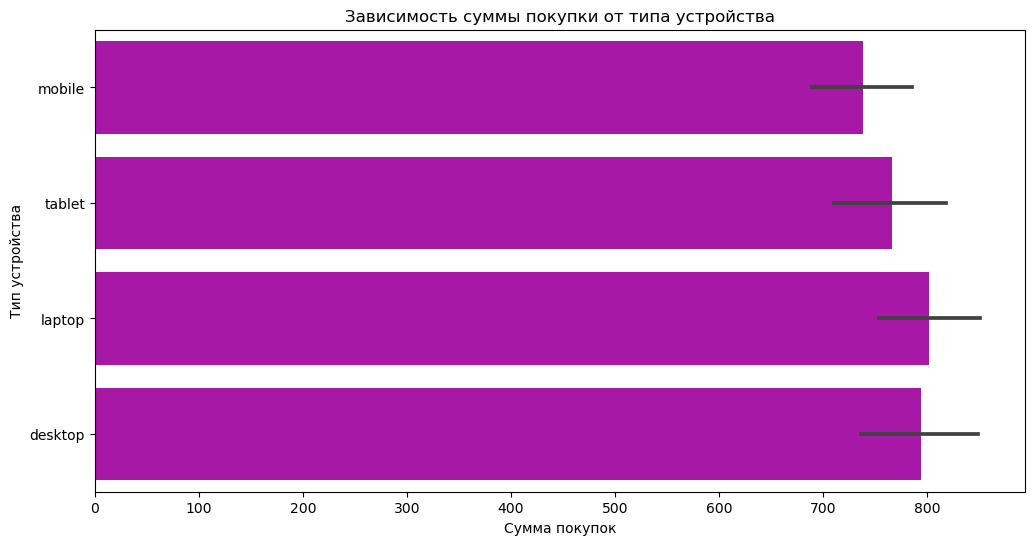

In [90]:
# Задание 4 (График 1): Визуализация зависимости cуммы покупки от типа устройства
plt.figure(figsize=(12, 6))
sns.barplot(x = 'bill', y = 'device_type', color = 'm', data=data)
plt.title('Зависимость суммы покупки от типа устройства')
plt.xlabel('Сумма покупок')
plt.ylabel('Тип устройства')
plt.show()

Этот график показывает нам незначительный перевес в использовании компьютеров и ноутбуков во время совершения покупки, возможно, наша бобильная весия не такая удобная.

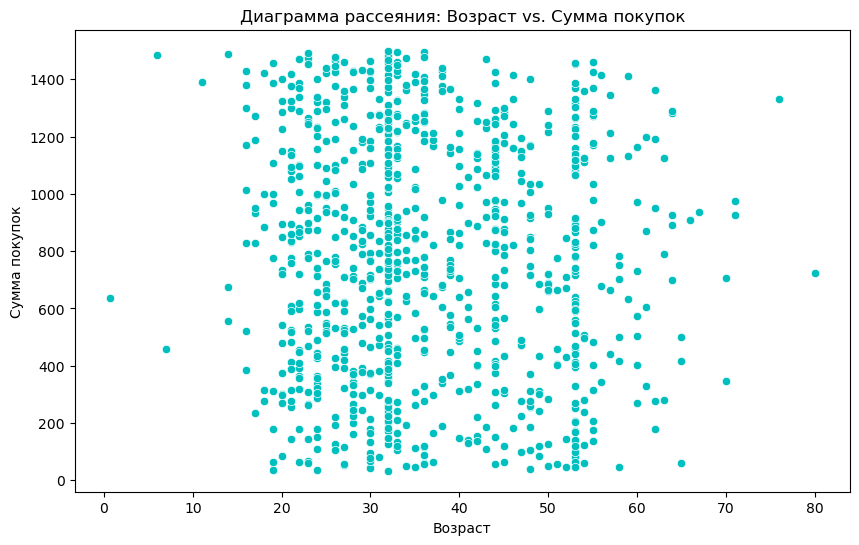

In [94]:
# График 2: Диаграмма рассеяния для возраста и суммы покупок
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bill', color = 'c', data=data)
plt.xlabel('Возраст')
plt.ylabel('Сумма покупок')
plt.title('Диаграмма рассеяния: Возраст vs. Сумма покупок')
plt.show()

На этом графике отчетливо видны возростные группы нашей целевой аудитории: 20-55 лет, наиболее активными являются покупатели от 20 до 35, поэтому этот фактор может положительно повлиять на рост суммы покупок.

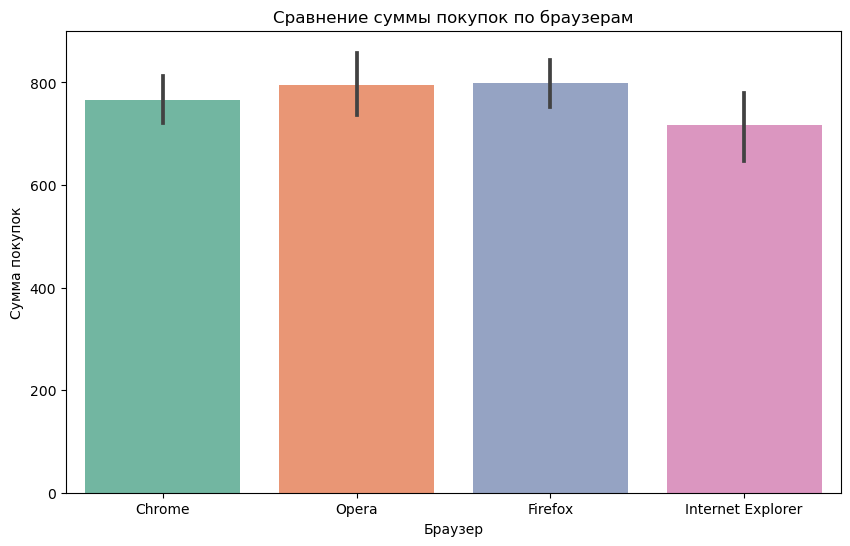

In [101]:
# График 3: Столбчатая диаграмма для сравнения браузеров
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set2")
sns.barplot(x='browser', y='bill', data=data, palette=custom_palette)
plt.xlabel('Браузер')
plt.ylabel('Сумма покупок')
plt.title('Сравнение суммы покупок по браузерам')
plt.show()

Разница в частоте покупок с использованием определенного браузера не такая большая. Самые высокие показатели по двум браузерам могут дать нам больше информации по использованию определенных устройств, где могут быть предустановлены эти браузеры. При анализе с более подробными данными о типе или модели устройства, можно сделать выводы о поведенческих особенностях пользователей. Этот фактор незначительно влияет на сумму покупок пользоватлей, однако, может навести на другие факторы.

In [104]:
# График 4: Столбчатая диаграмма для сравнения по полу
plt.figure(figsize=(10, 6))
custom_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.barplot(x='sex', y='bill', data=data, palette=custom_palette)
plt.xlabel('Пол')
plt.ylabel('Сумма покупок')
plt.title('Сравнение суммы покупок по полу покупателя')
plt.show()

TypeError: 'ListedColormap' object is not iterable

<Figure size 1000x600 with 0 Axes>

Данный график показывает нам, что разницы в ср. сумме покупок бользователей мужского и женского пола практически не существует. Этот фактор не является ключевым.

На основе полученных данных нельзя дать определенные рекомендации, стоит провести более подробный анализ данных и уточнить влияние каждого фактора. Важно также учитывать контекст вашего бизнеса и аудитории при формулировке рекомендаций. Все рекомендации по каждому фактору влияния указаны под графиками.